<a href="https://colab.research.google.com/github/QuangThang2197/Baitap/blob/main/SVM_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
# Các thư viện cần thiết
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
#from google.colab import files
#uploaded = files.upload()

In [58]:
import io 
iris = pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [59]:
iris.rename(columns={'SepalLengthCm':'sepal_length', 'SepalWidthCm':'sepal_width', 
                     'PetalLengthCm':'petal_length', 'PetalWidthCm':'petal_width', 
                     'Species':'species'}, inplace=True)

In [60]:
iris.drop(labels='Id', axis=1, inplace=True)

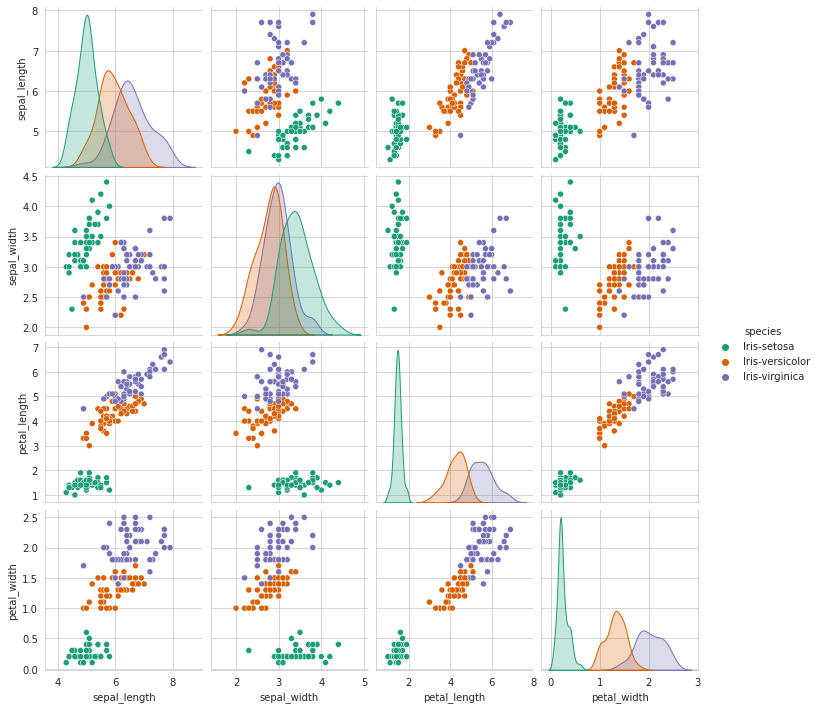

In [61]:
sns.pairplot(iris,hue='species',palette='Dark2')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

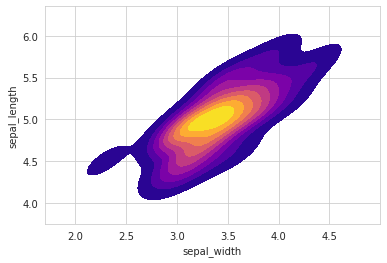

In [62]:
sns.set_style('whitegrid')
iris_setosa = iris[iris['species']=='Iris-setosa']
sns.kdeplot(iris_setosa['sepal_width'], iris_setosa['sepal_length'],shade=True,cmap='plasma',shade_lowest=False)

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [132]:
X = iris.drop('species',axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [133]:
model = SVC()

In [134]:
model.fit(X_train, y_train)

SVC()

In [135]:
preds = model.predict(X_test)

In [136]:
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef


In [137]:
confusion_matrix(y_test,preds)

array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  7]])

In [138]:
print(classification_report(y_test,preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [139]:
matthews_corrcoef(y_test,preds)

1.0